## 1. Hierarchical clustering

In [1]:
import seaborn as sns
import numpy as npy
import pandas as pd
import pyreadr
from lifelines import KaplanMeierFitter

In [2]:
df = pd.read_csv('/omics/odcf/analysis/OE0167_projects/dachs_genetic_data_platform/markernegative_summary/data/gene_approach/train_gene.csv')

df.head()

,id,neoadth,TNM_stra,Diagnosis_year,Age_diag,Sex,chemradther,TNM_adj,Location,timey,...,SNORD83A,ROPN1,KRTAP4-12,PLSCR5,TMEM8C,MIR548I2,PTPRQ,SNORD114-29,ECM1,KRTAP10-10
0,DA-F-0105,No,2,2003-07-07,87,Male,No,II,Proximal colon,5.002053,...,0.108089,0.306788,0.322455,0.436726,0.321537,0.706619,0.576120,0.948454,0.321962,0.635701
1,DA-F-0159,No,2,2003-01-21,73,Male,No,II,Distal colon,16.049281,...,0.095011,0.750278,0.433209,0.305952,0.449205,0.726568,0.156295,0.886412,0.213362,0.816018
2,DA-F-0174,No,2,2003-12-18,90,Female,No,II,Proximal colon,2.475017,...,0.081354,0.300340,0.326908,0.264402,0.435111,0.852878,0.142085,0.838399,0.252098,0.530382
3,DA-F-0193,No,2,2005-08-30,70,Male,No,II,Distal colon,4.134155,...,0.117161,0.131743,0.286410,0.207702,0.220652,0.880025,0.231197,0.855664,0.253640,0.470344
4,DA-F-0197,No,2,2004-04-02,94,Male,No,II,Proximal colon,7.917864,...,0.286102,0.440110,0.327310,0.450922,0.415131,0.935406,0.249266,0.748740,0.146435,0.785420


In [3]:
genes = df.iloc[:, 19: ]
genes.head()

,CDKN2A,WNT5A,MLH1,EVL,GPR19,ERBB2IP,ZNF528,ALPL,RYBP,PLD3,...,SNORD83A,ROPN1,KRTAP4-12,PLSCR5,TMEM8C,MIR548I2,PTPRQ,SNORD114-29,ECM1,KRTAP10-10
0,0.201062,0.207894,0.568079,0.679403,0.193686,0.363787,0.506199,0.528947,0.178425,0.233892,...,0.108089,0.306788,0.322455,0.436726,0.321537,0.706619,0.576120,0.948454,0.321962,0.635701
1,0.185174,0.069618,0.211054,0.789646,0.190343,0.378196,0.112070,0.449860,0.122672,0.291610,...,0.095011,0.750278,0.433209,0.305952,0.449205,0.726568,0.156295,0.886412,0.213362,0.816018
2,0.262169,0.106673,0.212419,0.624832,0.162849,0.354874,0.434704,0.496405,0.223504,0.269034,...,0.081354,0.300340,0.326908,0.264402,0.435111,0.852878,0.142085,0.838399,0.252098,0.530382
3,0.294379,0.043931,0.172952,0.664351,0.179512,0.376500,0.316396,0.337715,0.177848,0.249834,...,0.117161,0.131743,0.286410,0.207702,0.220652,0.880025,0.231197,0.855664,0.253640,0.470344
4,0.240159,0.124401,0.228220,0.655636,0.180638,0.370878,0.635605,0.553694,0.205759,0.289407,...,0.286102,0.440110,0.327310,0.450922,0.415131,0.935406,0.249266,0.748740,0.146435,0.785420


In [6]:
## make the color map for clinical characteristics
stage = {
      'IIA': 'g',
      'IIB/C': 'r'
}
sex = dict(zip(df['Sex'].unique(), "rbg"))
death = dict(zip(df['death_all'].unique(), "rbg"))
recur = dict(zip(df['recurr'].unique(), "rbg"))

In [7]:
row_colors = pd.concat([df['TNM_II'].map(stage),
                       df['Sex'].map(sex),
                       df['death_all'].map(death),
                       df['recurr'].map(recur)], axis=1)
print(row_colors)

    TNM_II Sex death_all recurr
0        g   r         r      r
1        g   r         r      r
2        g   b         r      r
3        r   r         r      b
4        g   r         r      r
..     ...  ..       ...    ...
390      g   r         r      r
391      g   b         b      r
392      g   b         b      r
393      g   r         b      r
394      g   r         b      r

[395 rows x 4 columns]


##### first cluster genes

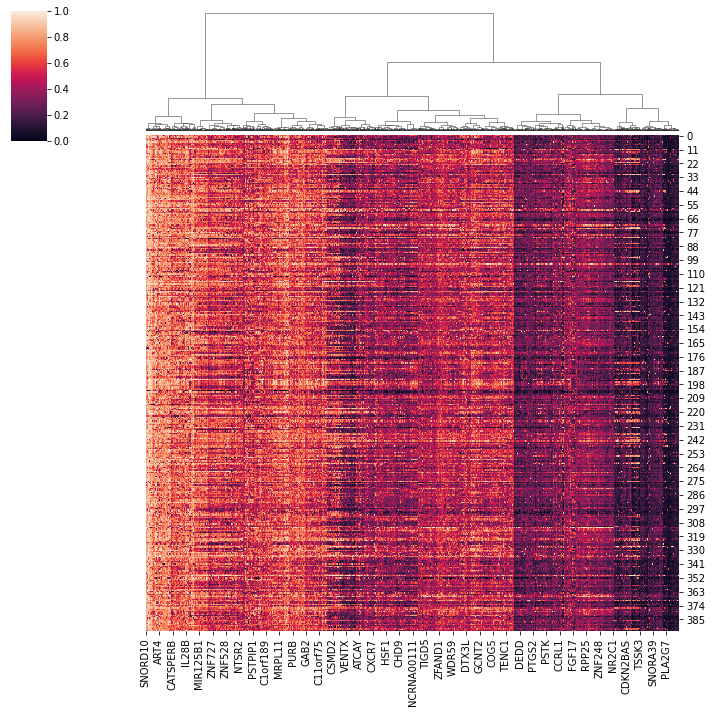

In [8]:
sns.clustermap(genes, standard_scale = 1, method = 'ward',
               row_cluster=False)

Text(0.5, 1.0, 'Hierarchical clustering')

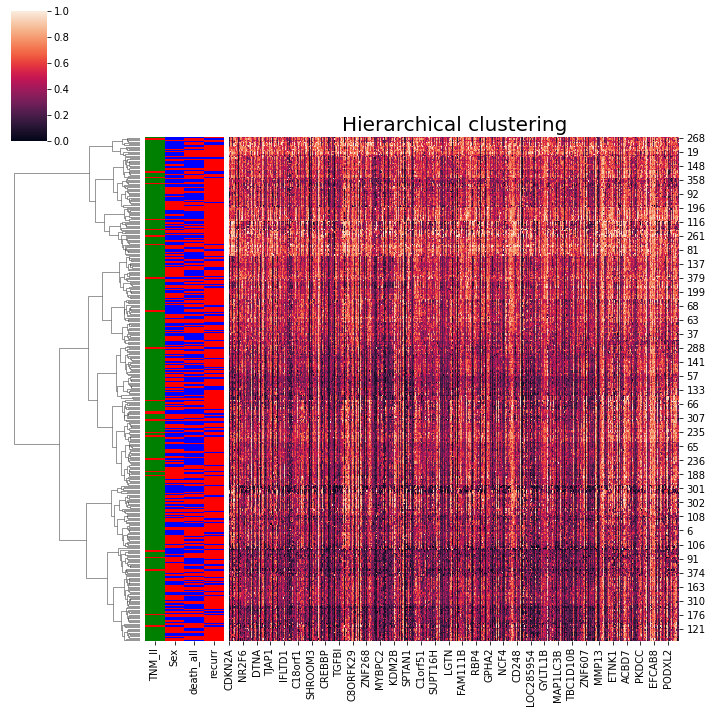

In [12]:
clustermap = sns.clustermap(genes, standard_scale = 1, method = 'ward', 
                            row_cluster = True, col_cluster =  False, row_colors = row_colors)
title = "Hierarchical clustering"
clustermap.ax_heatmap.set_title(title, fontsize=20)

seems to be 2-4 clusters..

## 2. K means clustering

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import pyreadr
from lifelines import KaplanMeierFitter

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import silhouette_score

In [2]:
seed = 0
# Generate some sample data
np.random.seed(0)

In [3]:
df = pd.read_csv('/omics/odcf/analysis/OE0167_projects/dachs_genetic_data_platform/markernegative_summary/data/gene_approach/train_gene.csv')
df.head()

,id,neoadth,TNM_stra,Diagnosis_year,Age_diag,Sex,chemradther,TNM_adj,Location,timey,...,SNORD83A,ROPN1,KRTAP4-12,PLSCR5,TMEM8C,MIR548I2,PTPRQ,SNORD114-29,ECM1,KRTAP10-10
0,DA-F-0105,No,2,2003-07-07,87,Male,No,II,Proximal colon,5.002053,...,0.108089,0.306788,0.322455,0.436726,0.321537,0.706619,0.576120,0.948454,0.321962,0.635701
1,DA-F-0159,No,2,2003-01-21,73,Male,No,II,Distal colon,16.049281,...,0.095011,0.750278,0.433209,0.305952,0.449205,0.726568,0.156295,0.886412,0.213362,0.816018
2,DA-F-0174,No,2,2003-12-18,90,Female,No,II,Proximal colon,2.475017,...,0.081354,0.300340,0.326908,0.264402,0.435111,0.852878,0.142085,0.838399,0.252098,0.530382
3,DA-F-0193,No,2,2005-08-30,70,Male,No,II,Distal colon,4.134155,...,0.117161,0.131743,0.286410,0.207702,0.220652,0.880025,0.231197,0.855664,0.253640,0.470344
4,DA-F-0197,No,2,2004-04-02,94,Male,No,II,Proximal colon,7.917864,...,0.286102,0.440110,0.327310,0.450922,0.415131,0.935406,0.249266,0.748740,0.146435,0.785420


In [4]:
genes = df.iloc[:, 19: ]
genes.head()

,CDKN2A,WNT5A,MLH1,EVL,GPR19,ERBB2IP,ZNF528,ALPL,RYBP,PLD3,...,SNORD83A,ROPN1,KRTAP4-12,PLSCR5,TMEM8C,MIR548I2,PTPRQ,SNORD114-29,ECM1,KRTAP10-10
0,0.201062,0.207894,0.568079,0.679403,0.193686,0.363787,0.506199,0.528947,0.178425,0.233892,...,0.108089,0.306788,0.322455,0.436726,0.321537,0.706619,0.576120,0.948454,0.321962,0.635701
1,0.185174,0.069618,0.211054,0.789646,0.190343,0.378196,0.112070,0.449860,0.122672,0.291610,...,0.095011,0.750278,0.433209,0.305952,0.449205,0.726568,0.156295,0.886412,0.213362,0.816018
2,0.262169,0.106673,0.212419,0.624832,0.162849,0.354874,0.434704,0.496405,0.223504,0.269034,...,0.081354,0.300340,0.326908,0.264402,0.435111,0.852878,0.142085,0.838399,0.252098,0.530382
3,0.294379,0.043931,0.172952,0.664351,0.179512,0.376500,0.316396,0.337715,0.177848,0.249834,...,0.117161,0.131743,0.286410,0.207702,0.220652,0.880025,0.231197,0.855664,0.253640,0.470344
4,0.240159,0.124401,0.228220,0.655636,0.180638,0.370878,0.635605,0.553694,0.205759,0.289407,...,0.286102,0.440110,0.327310,0.450922,0.415131,0.935406,0.249266,0.748740,0.146435,0.785420


In [5]:
# also include test and external dataset
df_test = pd.read_csv('/omics/odcf/analysis/OE0167_projects/dachs_genetic_data_platform/markernegative_summary/data/gene_approach/test_gene.csv')
df_external = pd.read_csv('/omics/odcf/analysis/OE0167_projects/dachs_genetic_data_platform/markernegative_summary/data/gene_approach/df_external_gene.csv')

In [6]:
df_test.head()

,id,neoadth,TNM_stra,Diagnosis_year,Age_diag,Sex,chemradther,TNM_adj,Location,timey,...,SNORD83A,ROPN1,KRTAP4-12,PLSCR5,TMEM8C,MIR548I2,PTPRQ,SNORD114-29,ECM1,KRTAP10-10
0,DA-F-0151,No,2,2003-12-29,54,Male,No,II,Proximal colon,15.460643,...,0.166544,0.533271,0.622802,0.543349,0.611285,0.834829,0.471157,0.686525,0.457513,0.846874
1,DA-F-0152,No,2,2003-12-09,57,Male,No,II,Distal colon,16.199863,...,0.150132,0.164769,0.565055,0.485481,0.487056,0.877347,0.212280,0.516191,0.304645,0.567050
2,DA-F-0166,No,2,2004-10-08,78,Female,No,II,Proximal colon,11.852156,...,0.236804,0.544810,0.371758,0.449543,0.388087,0.852644,0.438060,0.962038,0.264974,0.843990
3,DA-F-0178,No,2,2003-02-26,83,Female,No,II,Proximal colon,6.631075,...,0.068340,0.586362,0.226977,0.173662,0.303052,0.919788,0.118351,0.916150,0.151360,0.429285
4,DA-F-0195,No,2,2003-03-25,78,Male,No,II,Proximal colon,9.026694,...,0.093173,0.367454,0.147015,0.181619,0.247404,0.904624,0.175251,0.897770,0.256729,0.770029


In [7]:
test_genes = df_test.iloc[:, 19: ]
test_genes.head()

,CDKN2A,WNT5A,MLH1,EVL,GPR19,ERBB2IP,ZNF528,ALPL,RYBP,PLD3,...,SNORD83A,ROPN1,KRTAP4-12,PLSCR5,TMEM8C,MIR548I2,PTPRQ,SNORD114-29,ECM1,KRTAP10-10
0,0.357838,0.518879,0.609648,0.726017,0.196252,0.381531,0.574965,0.655921,0.227526,0.294967,...,0.166544,0.533271,0.622802,0.543349,0.611285,0.834829,0.471157,0.686525,0.457513,0.846874
1,0.299384,0.148249,0.163151,0.628420,0.269248,0.383883,0.515610,0.536577,0.276768,0.340797,...,0.150132,0.164769,0.565055,0.485481,0.487056,0.877347,0.212280,0.516191,0.304645,0.567050
2,0.183876,0.069467,0.259699,0.761327,0.176181,0.373989,0.652517,0.473497,0.166248,0.290956,...,0.236804,0.544810,0.371758,0.449543,0.388087,0.852644,0.438060,0.962038,0.264974,0.843990
3,0.218298,0.069793,0.244566,0.663711,0.219042,0.369846,0.431101,0.386097,0.178205,0.272673,...,0.068340,0.586362,0.226977,0.173662,0.303052,0.919788,0.118351,0.916150,0.151360,0.429285
4,0.317319,0.607898,0.139563,0.583754,0.178456,0.389484,0.558719,0.500348,0.131134,0.297908,...,0.093173,0.367454,0.147015,0.181619,0.247404,0.904624,0.175251,0.897770,0.256729,0.770029


In [8]:
df_external.head()

,id,TNM_II,Sex,Age_diag,recurr_cp,recurr_timey,event_global,time_global,metastasis_site,Location,...,SNORD83A,ROPN1,KRTAP4-12,PLSCR5,TMEM8C,MIR548I2,PTPRQ,SNORD114-29,ECM1,KRTAP10-10
0,A2004_T,IIA,Male,66,0,4.301164,0,4.301164,NaN,Distal colon,...,0.521000,0.507,0.328,0.6005,0.651,0.831,0.382,0.713,0.60675,0.755
1,A2027_T,IIA,Female,51,1,1.210130,0,2.746064,Liver,Distal colon,...,0.374667,0.258,0.365,0.5180,0.257,0.803,0.287,0.300,0.43600,0.882
2,A2050_T,IIA,Male,60,0,5.275838,0,5.275838,NaN,Distal colon,...,0.466667,0.328,0.274,0.5855,0.406,0.851,0.410,0.908,0.55475,0.642
3,A2073_T,IIA,Male,74,0,6.340862,0,6.340862,NaN,Distal colon,...,0.451000,0.721,0.532,0.5825,0.609,0.834,0.462,0.870,0.61350,0.829
4,A2096_T,IIA,Female,85,0,2.067077,0,2.067077,NaN,Distal colon,...,0.360333,0.791,0.358,0.5080,0.684,0.869,0.577,0.626,0.59250,0.860


In [9]:
external_genes = df_external.iloc[:, 10: ]
external_genes.head()

,CDKN2A,WNT5A,MLH1,EVL,GPR19,ERBB2IP,ZNF528,ALPL,RYBP,PLD3,...,SNORD83A,ROPN1,KRTAP4-12,PLSCR5,TMEM8C,MIR548I2,PTPRQ,SNORD114-29,ECM1,KRTAP10-10
0,0.183333,0.077455,0.238000,0.779000,0.202143,0.436353,0.494917,0.44180,0.1691,0.299864,...,0.521000,0.507,0.328,0.6005,0.651,0.831,0.382,0.713,0.60675,0.755
1,0.368833,0.553000,0.265227,0.856000,0.269357,0.439647,0.521000,0.55856,0.2154,0.314955,...,0.374667,0.258,0.365,0.5180,0.257,0.803,0.287,0.300,0.43600,0.882
2,0.175333,0.149909,0.143500,0.773667,0.199286,0.437941,0.436083,0.46856,0.2073,0.277773,...,0.466667,0.328,0.274,0.5855,0.406,0.851,0.410,0.908,0.55475,0.642
3,0.161000,0.083818,0.246568,0.742000,0.234714,0.445588,0.395167,0.48720,0.2376,0.309318,...,0.451000,0.721,0.532,0.5825,0.609,0.834,0.462,0.870,0.61350,0.829
4,0.222500,0.084182,0.229773,0.818667,0.212071,0.433824,0.704917,0.44776,0.1965,0.300318,...,0.360333,0.791,0.358,0.5080,0.684,0.869,0.577,0.626,0.59250,0.860


In [10]:
scale = StandardScaler().fit(genes)
genes_scaled = scale.transform(genes)

test_genes_scaled = scale.transform(test_genes)
external_genes_scaled = scale.transform(external_genes)

Text(0, 0.5, 'Inertia')

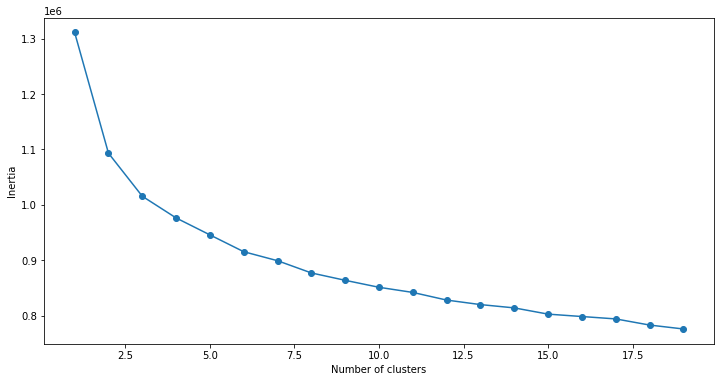

In [13]:
## using elbow methods to determine the number of clusters
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(genes_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})


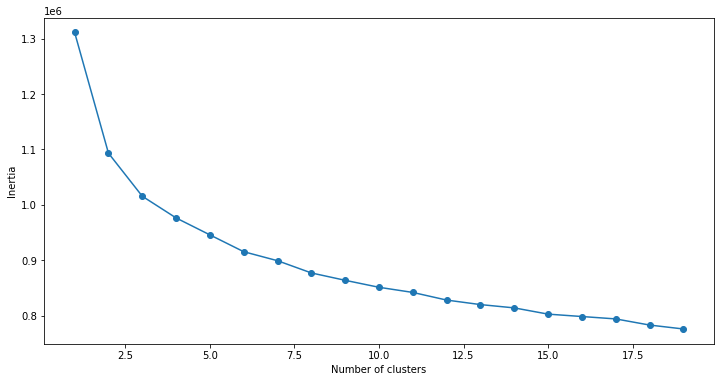

In [15]:
fig = plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
fig.savefig('elblow_Inertia.png', dpi=500)

In [16]:
K = range(2, 20)
fits = []
score = []

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, init='k-means++').fit(genes_scaled)
    
    #append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(genes_scaled, model.labels_, metric='euclidean'))

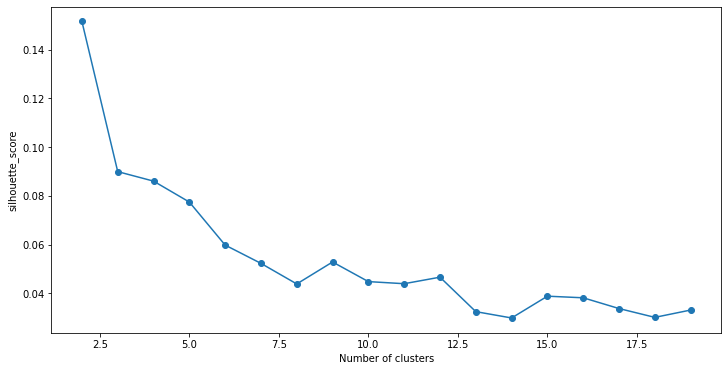

In [17]:
frame = pd.DataFrame({'Cluster':range(2,20), 'silhouette_score':score})
fig = plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['silhouette_score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')

fig.savefig('elblow_silhouette.png', dpi=500)

### K = 8

##### training set

In [11]:
seed = 0

In [12]:
kmeans = KMeans(n_clusters = 8, init='k-means++', random_state = seed)

kmeans.fit(genes_scaled)
cluster_labels = kmeans.predict(genes_scaled)

frame = pd.DataFrame(genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

2    82
1    66
6    60
7    49
4    47
5    40
3    30
0    21
Name: cluster, dtype: int64

In [13]:
from lifelines import KaplanMeierFitter
## compare survival curves
df['cluster_label'] = cluster_labels

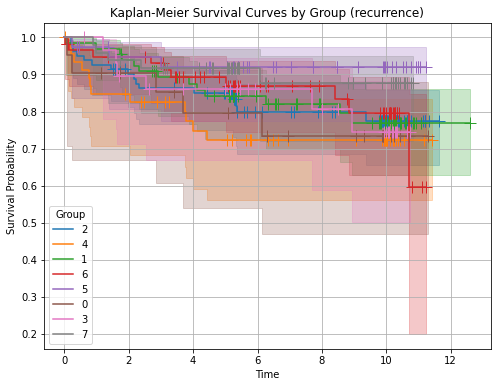

In [14]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df[df['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

In [31]:
# cluster 4, cluster 5, cluster 7

##### test set

In [15]:
cluster_labels = kmeans.predict(test_genes_scaled)

frame = pd.DataFrame(test_genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

2    32
1    27
6    19
7    18
5    13
4    12
0     5
3     5
Name: cluster, dtype: int64

In [16]:
from lifelines import KaplanMeierFitter
## compare survival curves
df_test['cluster_label'] = cluster_labels

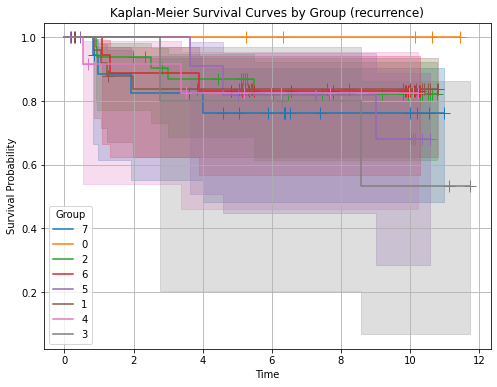

In [17]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df_test['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df_test[df_test['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

##### external set

In [18]:
cluster_labels = kmeans.predict(external_genes_scaled)

frame = pd.DataFrame(external_genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

3    44
2    20
1    14
7     5
0     5
6     4
4     2
5     2
Name: cluster, dtype: int64

In [19]:
from lifelines import KaplanMeierFitter
## compare survival curves
df_external['cluster_label'] = cluster_labels

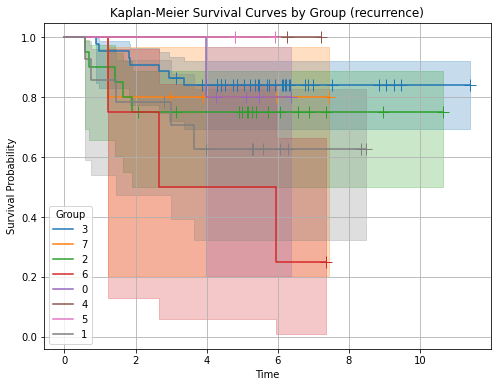

In [20]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df_external['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df_external[df_external['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr_cp'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

### K = 7

##### training set

In [27]:
kmeans = KMeans(n_clusters = 7, init='k-means++', random_state = seed)
kmeans.fit(genes_scaled)
cluster_labels = kmeans.predict(genes_scaled)

frame = pd.DataFrame(genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

5    80
0    74
4    61
3    59
2    52
1    45
6    24
Name: cluster, dtype: int64

In [28]:
from lifelines import KaplanMeierFitter
## compare survival curves
df['cluster_label'] = cluster_labels

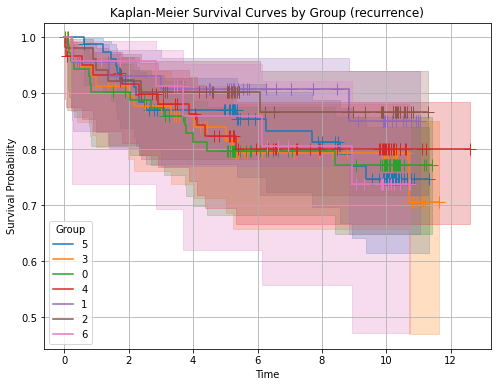

In [29]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df[df['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

In [15]:
# cluster 4, cluster 5, cluster 7

##### test set

In [30]:
cluster_labels = kmeans.predict(test_genes_scaled)
frame = pd.DataFrame(test_genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

5    28
3    21
0    21
4    21
2    20
1    14
6     6
Name: cluster, dtype: int64

In [31]:
from lifelines import KaplanMeierFitter
## compare survival curves
df_test['cluster_label'] = cluster_labels

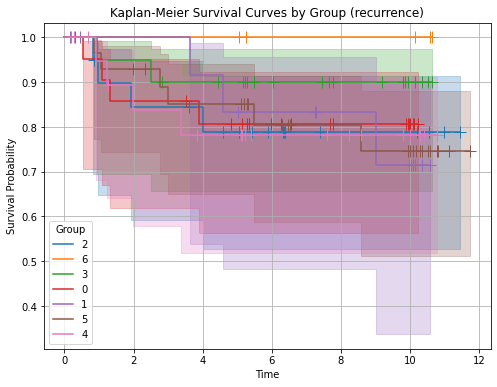

In [32]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df_test['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df_test[df_test['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

##### external set

In [33]:
cluster_labels = kmeans.predict(external_genes_scaled)

frame = pd.DataFrame(external_genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

5    53
3    20
6    11
2     3
0     3
1     3
4     3
Name: cluster, dtype: int64

In [34]:
from lifelines import KaplanMeierFitter
## compare survival curves
df_external['cluster_label'] = cluster_labels

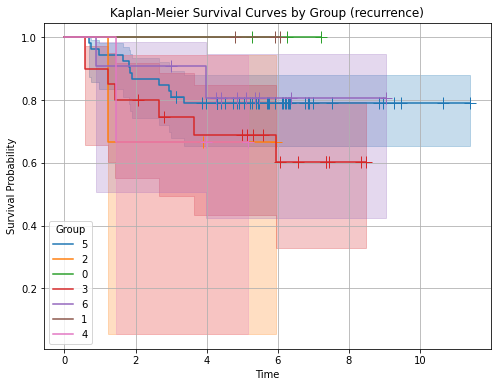

In [35]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df_external['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df_external[df_external['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr_cp'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

### K = 6

##### training set

In [36]:
kmeans = KMeans(n_clusters = 6, init='k-means++', random_state = seed)
kmeans.fit(genes_scaled)
cluster_labels = kmeans.predict(genes_scaled)

frame = pd.DataFrame(genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

4    98
1    94
3    79
2    66
5    29
0    29
Name: cluster, dtype: int64

In [38]:
from lifelines import KaplanMeierFitter
## compare survival curves
df['cluster_label'] = cluster_labels

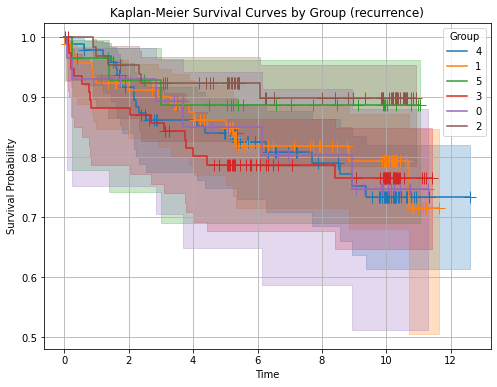

In [39]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df[df['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

In [15]:
# cluster 4, cluster 5, cluster 7

##### test set

In [40]:
cluster_labels = kmeans.predict(test_genes_scaled)

frame = pd.DataFrame(test_genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

1    38
4    29
3    22
2    21
5    12
0     9
Name: cluster, dtype: int64

In [41]:
from lifelines import KaplanMeierFitter
## compare survival curves
df_test['cluster_label'] = cluster_labels

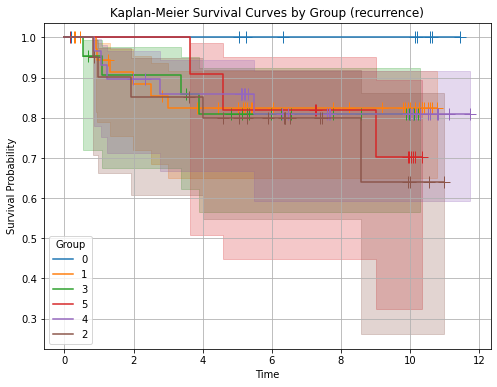

In [42]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df_test['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df_test[df_test['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

##### external set

In [43]:
cluster_labels = kmeans.predict(external_genes_scaled)

frame = pd.DataFrame(external_genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

4    54
1    20
0    12
2     7
3     3
Name: cluster, dtype: int64

In [44]:
from lifelines import KaplanMeierFitter
## compare survival curves
df_external['cluster_label'] = cluster_labels

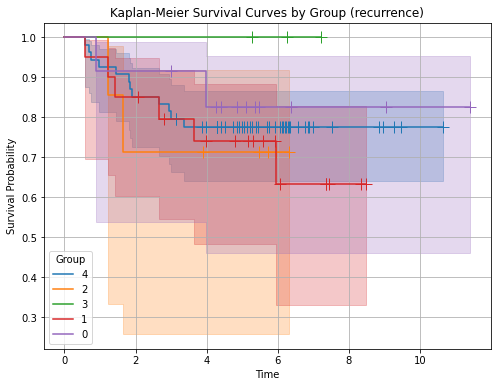

In [45]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df_external['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df_external[df_external['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr_cp'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

### K = 5

##### training set

In [46]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state = seed)
kmeans.fit(genes_scaled)
cluster_labels = kmeans.predict(genes_scaled)

frame = pd.DataFrame(genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

3    144
1     89
2     70
0     62
4     30
Name: cluster, dtype: int64

In [47]:
from lifelines import KaplanMeierFitter
## compare survival curves
df['cluster_label'] = cluster_labels

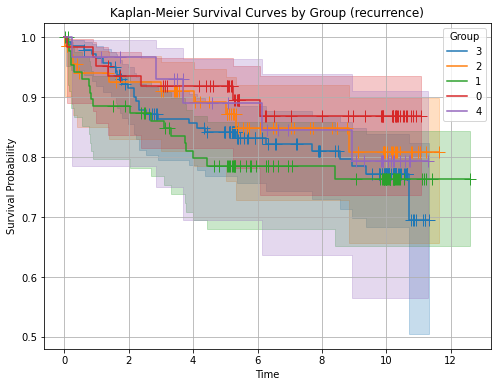

In [48]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df[df['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

In [15]:
# cluster 4, cluster 5, cluster 7

##### test set

In [49]:
cluster_labels = kmeans.predict(test_genes_scaled)

frame = pd.DataFrame(test_genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

3    47
2    28
1    27
0    20
4     9
Name: cluster, dtype: int64

In [50]:
from lifelines import KaplanMeierFitter
## compare survival curves
df_test['cluster_label'] = cluster_labels

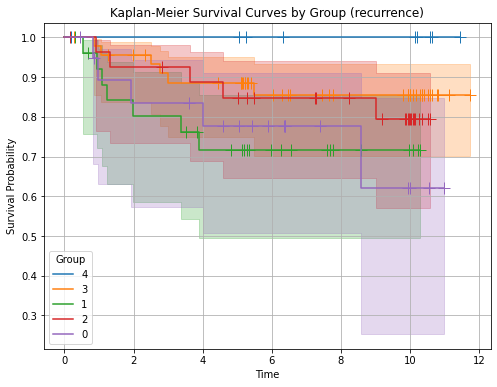

In [51]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df_test['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df_test[df_test['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

##### external set

In [52]:
cluster_labels = kmeans.predict(external_genes_scaled)

frame = pd.DataFrame(external_genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

3    64
4    16
1     6
0     5
2     5
Name: cluster, dtype: int64

In [53]:
from lifelines import KaplanMeierFitter
## compare survival curves
df_external['cluster_label'] = cluster_labels

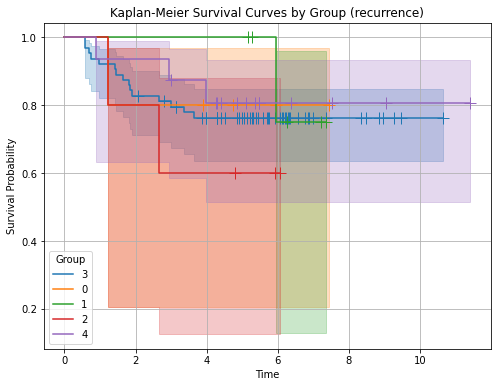

In [54]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df_external['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df_external[df_external['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr_cp'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

### K = 4

##### training set

In [21]:
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state = seed)
kmeans.fit(genes_scaled)
cluster_labels = kmeans.predict(genes_scaled)

frame = pd.DataFrame(genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

0    152
3    119
1     65
2     59
Name: cluster, dtype: int64

In [22]:
## save the model
import pickle
# Save the model to a file using joblib
filename = 'kmeans_model_4c.pkl'
with open(filename, 'wb') as file:
    pickle.dump(kmeans, file)

In [23]:
from lifelines import KaplanMeierFitter
## compare survival curves
df['cluster_label'] = cluster_labels

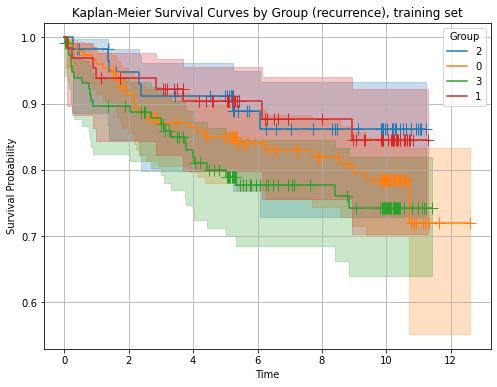

In [24]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df[df['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence), training set')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

In [170]:
#  save the df
df.to_csv('/omics/odcf/analysis/OE0167_projects/dachs_genetic_data_platform/markernegative_summary/data/gene_approach/train_gene_4c.csv',
         index = False)

##### test set

In [25]:
cluster_labels = kmeans.predict(test_genes_scaled)

frame = pd.DataFrame(test_genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

0    52
3    35
2    24
1    20
Name: cluster, dtype: int64

In [26]:
from lifelines import KaplanMeierFitter
## compare survival curves
df_test['cluster_label'] = cluster_labels

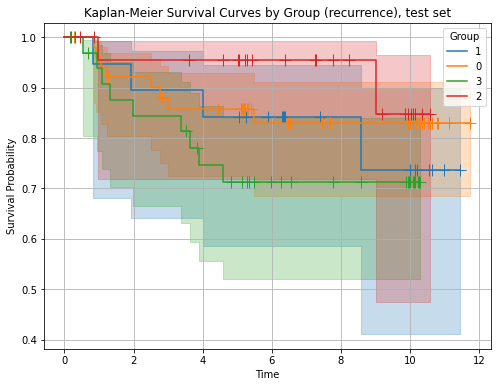

In [27]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df_test['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df_test[df_test['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence), test set')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

In [169]:
df_test.to_csv('/omics/odcf/analysis/OE0167_projects/dachs_genetic_data_platform/markernegative_summary/data/gene_approach/test_gene_4c.csv',
         index = False)

##### external set

In [28]:
cluster_labels = kmeans.predict(external_genes_scaled)

frame = pd.DataFrame(external_genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

0    59
1    25
3     8
2     4
Name: cluster, dtype: int64

In [29]:
from lifelines import KaplanMeierFitter
## compare survival curves
df_external['cluster_label'] = cluster_labels

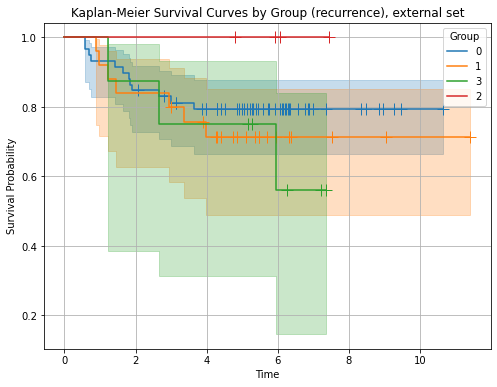

In [30]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df_external['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df_external[df_external['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr_cp'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence), external set')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

In [171]:
df_external.to_csv('/omics/odcf/analysis/OE0167_projects/dachs_genetic_data_platform/markernegative_summary/data/gene_approach/exgene_4c.csv',
         index = False)

### K = 3

##### training set

In [65]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state = seed)
kmeans.fit(genes_scaled)
cluster_labels = kmeans.predict(genes_scaled)

frame = pd.DataFrame(genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

2    173
0    147
1     75
Name: cluster, dtype: int64

In [66]:
from lifelines import KaplanMeierFitter
## compare survival curves
df['cluster_label'] = cluster_labels

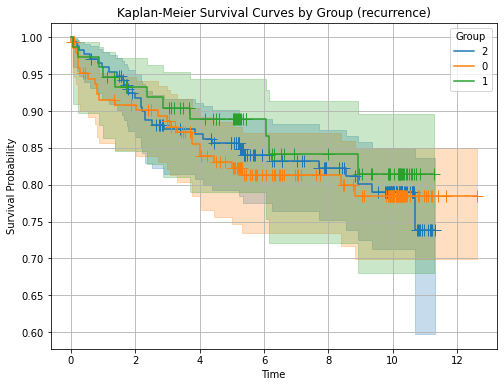

In [67]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df[df['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

In [58]:
# cluster 4, cluster 5, cluster 7

##### test set

In [68]:
cluster_labels = kmeans.predict(test_genes_scaled)

frame = pd.DataFrame(test_genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

2    60
0    46
1    25
Name: cluster, dtype: int64

In [69]:
from lifelines import KaplanMeierFitter
## compare survival curves
df_test['cluster_label'] = cluster_labels

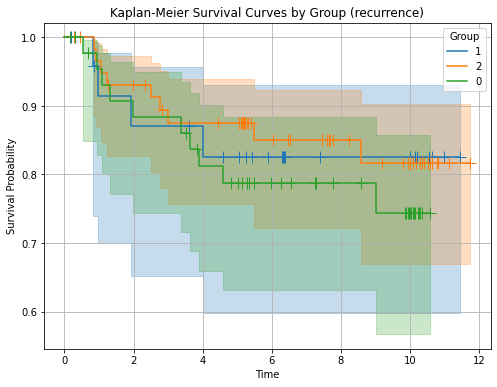

In [70]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df_test['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df_test[df_test['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

##### external set

In [71]:
cluster_labels = kmeans.predict(external_genes_scaled)

frame = pd.DataFrame(external_genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

2    68
1    21
0     7
Name: cluster, dtype: int64

In [72]:
from lifelines import KaplanMeierFitter
## compare survival curves
df_external['cluster_label'] = cluster_labels

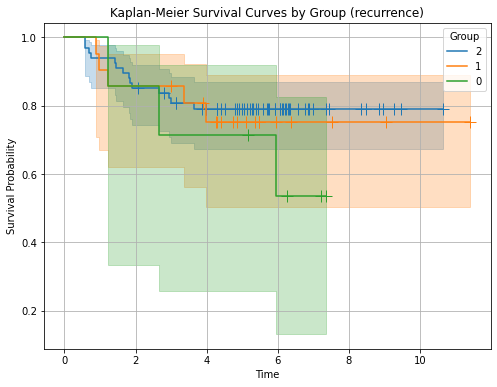

In [73]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df_external['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df_external[df_external['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr_cp'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

### K = 2

##### training set

In [74]:
kmeans = KMeans(n_clusters = 2, init='k-means++', random_state = seed)
kmeans.fit(genes_scaled)
cluster_labels = kmeans.predict(genes_scaled)

frame = pd.DataFrame(genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

0    245
1    150
Name: cluster, dtype: int64

In [75]:
from lifelines import KaplanMeierFitter
## compare survival curves
df['cluster_label'] = cluster_labels

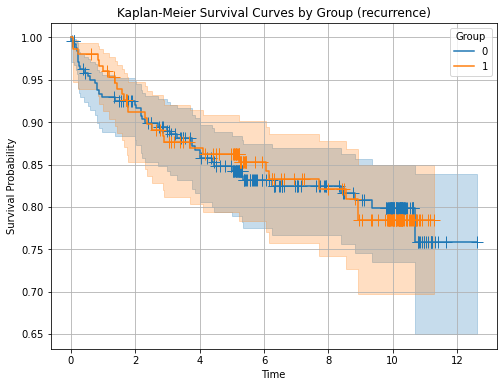

In [76]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df[df['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

In [77]:
# cluster 4, cluster 5, cluster 7

##### test set

In [78]:
cluster_labels = kmeans.predict(test_genes_scaled)

frame = pd.DataFrame(test_genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

0    77
1    54
Name: cluster, dtype: int64

In [79]:
from lifelines import KaplanMeierFitter
## compare survival curves
df_test['cluster_label'] = cluster_labels

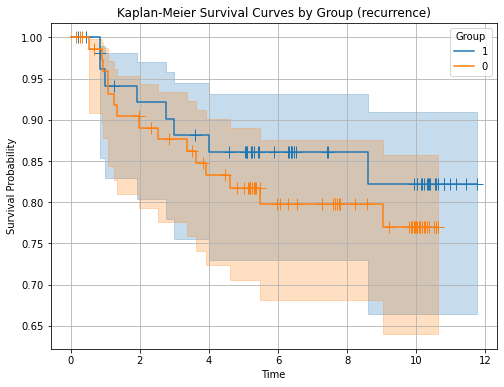

In [80]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df_test['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df_test[df_test['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()

##### external set

In [81]:
cluster_labels = kmeans.predict(external_genes_scaled)

frame = pd.DataFrame(external_genes_scaled)
frame['cluster'] = cluster_labels
frame['cluster'].value_counts()

1    73
0    23
Name: cluster, dtype: int64

In [82]:
from lifelines import KaplanMeierFitter
## compare survival curves
df_external['cluster_label'] = cluster_labels

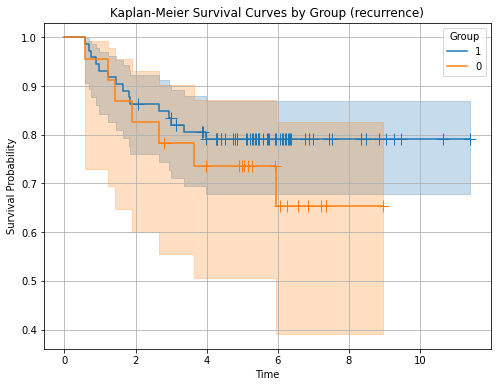

In [83]:
# Creating KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model for each group
groups = df_external['cluster_label'].unique()
plt.figure(figsize=(8, 6))

for i, grp in enumerate(groups):
    grp_data = df_external[df_external['cluster_label'] == grp]
    kmf.fit(grp_data['recurr_timey'], event_observed=grp_data['recurr_cp'], label=grp)
    kmf.plot(show_censors=True)
    
# Plot settings
plt.title('Kaplan-Meier Survival Curves by Group (recurrence)')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Group')
plt.grid(True)
plt.show()